# Data Mining on Hospital Dataset

In [149]:
import pandas as pd
import numpy as np

# Read Input

In [150]:
df = pd.read_csv('dataset/diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## PreProcessing and Data Cleaning

In [151]:
# Checking for missing value
attributes = ['race', 'gender', 'age', 'medical_specialty',
        'change','diabetesMed', 'readmitted']
for value in attributes:
    print(value,": ", sum(df[value] == '?'))


race :  2273
gender :  0
age :  0
medical_specialty :  49949
change :  0
diabetesMed :  0
readmitted :  0


In [108]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


In [152]:
# Replacing values containing question mark in Medical Speciality attribute to Family/GeneralPractice
df.loc[df['medical_specialty'] == "?", 'medical_specialty'] = 'Family/GeneralPractice'
df.loc[df['race'] == "?", 'race'] = 'Other'


In [153]:
# Dropping attributes like IDs and other attributes with 50% missing field
bad_features = ['encounter_id', 'patient_nbr','weight', 'payer_code','admission_type_id','discharge_disposition_id','admission_source_id', 'num_lab_procedures', 'num_procedures','num_medications', 'number_outpatient', 'number_emergency','number_inpatient', 'diag_1', 'diag_2', 'diag_3','number_diagnoses','examide','citoglipton']
df.drop(bad_features, inplace=True, axis =1)

In [154]:
attributes = [ 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
       'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']
for i in attributes:
    df.loc[df[i] == "Up", i] = i+"_Up"
    df.loc[df[i] == "Down", i] = i+"_Down"
    df.loc[df[i] == "Steady", i] = i+"_Steady"
    df.loc[df[i] == "No", i] = i+"_No"

df.loc[df['max_glu_serum'] == ">300", 'max_glu_serum'] = "max_glu_serum_300"
df.loc[df['max_glu_serum'] == ">200", 'max_glu_serum'] = "max_glu_serum_200"
df.loc[df['max_glu_serum'] == "None", 'max_glu_serum'] = "max_glu_serum_None"
df.loc[df['max_glu_serum'] == "Norm", 'max_glu_serum'] = "max_glu_serum_Norm"

df.loc[df['A1Cresult'] == ">8", 'A1Cresult'] = "A1Cresult_8"
df.loc[df['A1Cresult'] == ">7", 'A1Cresult'] = "A1Cresult_7"
df.loc[df['A1Cresult'] == "None", 'A1Cresult'] = "A1Cresult_None"
df.loc[df['A1Cresult'] == "Norm", 'A1Cresult'] = "A1Cresult_Norm"

df.loc[df['readmitted'] == "<30", 'readmitted'] = "readmitted<30"
df.loc[df['readmitted'] == ">30", 'readmitted'] = "readmitted>30"
df.loc[df['readmitted'] == "NO", 'readmitted'] = "readmitted_NO"
df['change'] = np.where(df['change']=="Ch", 1,0)

In [155]:
dummy = ['race', 'gender','age','metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
       'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'max_glu_serum','A1Cresult','readmitted', 'change','medical_specialty']
new_df = df
for attrb in dummy:
    attr = pd.get_dummies(df[attrb])
    new_df = df.join(attr)
    df.drop(attrb, inplace =True, axis =1)
    df = new_df
    
    
new_df.head()

,race,gender,age,time_in_hospital,medical_specialty,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,...,Surgery-General,Surgery-Maxillofacial,Surgery-Neuro,Surgery-Pediatric,Surgery-Plastic,Surgery-PlasticwithinHeadandNeck,Surgery-Thoracic,Surgery-Vascular,SurgicalSpecialty,Urology
0,Caucasian,Female,[0-10),1,Pediatrics-Endocrinology,max_glu_serum_None,A1Cresult_None,metformin_No,repaglinide_No,nateglinide_No,...,0,0,0,0,0,0,0,0,0,0
1,Caucasian,Female,[10-20),3,Family/GeneralPractice,max_glu_serum_None,A1Cresult_None,metformin_No,repaglinide_No,nateglinide_No,...,0,0,0,0,0,0,0,0,0,0
2,AfricanAmerican,Female,[20-30),2,Family/GeneralPractice,max_glu_serum_None,A1Cresult_None,metformin_No,repaglinide_No,nateglinide_No,...,0,0,0,0,0,0,0,0,0,0
3,Caucasian,Male,[30-40),2,Family/GeneralPractice,max_glu_serum_None,A1Cresult_None,metformin_No,repaglinide_No,nateglinide_No,...,0,0,0,0,0,0,0,0,0,0
4,Caucasian,Male,[40-50),1,Family/GeneralPractice,max_glu_serum_None,A1Cresult_None,metformin_No,repaglinide_No,nateglinide_No,...,0,0,0,0,0,0,0,0,0,0


In [156]:
df = new_df
df['diabetesMed'] = np.where(df['diabetesMed']=="Yes", 1,0)
for attrb in dummy:
    df.drop(attrb, inplace =True, axis =1)
        

In [157]:
df.head()

,time_in_hospital,diabetesMed,AfricanAmerican,Asian,Caucasian,Hispanic,Other,Female,Male,Unknown/Invalid,...,Surgery-General,Surgery-Maxillofacial,Surgery-Neuro,Surgery-Pediatric,Surgery-Plastic,Surgery-PlasticwithinHeadandNeck,Surgery-Thoracic,Surgery-Vascular,SurgicalSpecialty,Urology
0,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
df.to_csv('diabetic_data_clean.csv')
        

### Reading New Clean Dataset

In [159]:
df = pd.read_csv('dataset/diabetic_data_clean1.csv')

In [160]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
import pydot

Y = df['diabetesMed']
df.drop('diabetesMed', inplace = True, axis =1)



In [161]:
# Splitting the dataset into Test and Train
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, Y_train, Y_test = train_test_split(df,Y, random_state=1)

### Building Models

In [162]:
tree_gini  = DecisionTreeClassifier(max_depth= 5)
tree_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=5)
rfc = RandomForestClassifier()
gnb = GaussianNB()
mnb = MultinomialNB()
mlp = MLPClassifier(hidden_layer_sizes = 9,  max_iter= 800)
Models = [tree_gini, tree_entropy, rfc, gnb,mnb,mlp]
Model_Names = {0:'Decision Tree Gini Index',1:'Decision tree Entropy', 2:'Random Forest Classifier',3:'Gaussian Naive Bayes', 4:'Multinomial Naive Bayes',5:'Artificial Neural Network'}

###  Training Models

In [163]:
Train_Model = []
Predicted_Result = []
for model in Models:
    Train_Model.append(model.fit(X_train, Y_train))
    Predicted_Result.append(model.predict(X_test))
    

### Results

In [164]:
False_positive_rate = []
True_positive_rate = []
for i in range(len(Model_Names)):
    if i == 0 or i == 1:
        export_graphviz(Train_Model[i], out_file= 'diabetes.dot', feature_names= X_train.columns)
        (graph,) = pydot.graph_from_dot_file('diabetes.dot')
        graph.write_png('diabetes_pima.png')
        print("Accuracy using ",Model_Names.get(i), accuracy_score(Y_test, Predicted_Result[i])*100,"%")
        print("Confusion Matrix of", Model_Names.get(i), confusion_matrix(Y_test, Predicted_Result[i]))
        print("Classification report", Model_Names.get(i), classification_report(Y_test, Predicted_Result[i]))
        fpr, tpr,_ = roc_curve(Y_test, Predicted_Result[i])
        False_positive_rate.append(fpr)
        True_positive_rate.append(tpr)
        
    else:
        print("Accuracy using ",Model_Names.get(i), accuracy_score(Y_test, Predicted_Result[i])*100,"%")
        print("Confusion Matrix of", Model_Names.get(i), confusion_matrix(Y_test, Predicted_Result[i]))
        print("Classification report", Model_Names.get(i), classification_report(Y_test, Predicted_Result[i]))
        fpr, tpr,_ = roc_curve(Y_test, Predicted_Result[i])
        False_positive_rate.append(fpr)
        True_positive_rate.append(tpr)
    
            

Accuracy using  Decision Tree Gini Index 96.4507507271 %
Confusion Matrix of Decision Tree Gini Index [[ 5912     0]
 [  903 18627]]
Classification report Decision Tree Gini Index              precision    recall  f1-score   support

          0       0.87      1.00      0.93      5912
          1       1.00      0.95      0.98     19530

avg / total       0.97      0.96      0.97     25442

Accuracy using  Decision tree Entropy 96.4507507271 %
Confusion Matrix of Decision tree Entropy [[ 5912     0]
 [  903 18627]]
Classification report Decision tree Entropy              precision    recall  f1-score   support

          0       0.87      1.00      0.93      5912
          1       1.00      0.95      0.98     19530

avg / total       0.97      0.96      0.97     25442

Accuracy using  Random Forest Classifier 99.9646254225 %
Confusion Matrix of Random Forest Classifier [[ 5912     0]
 [    9 19521]]
Classification report Random Forest Classifier              precision    recall  f1-sc

# Data Visualization

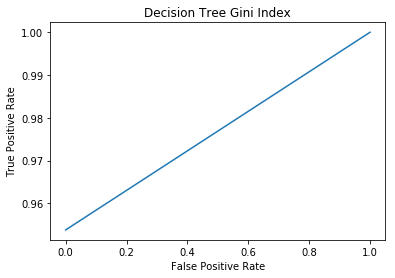

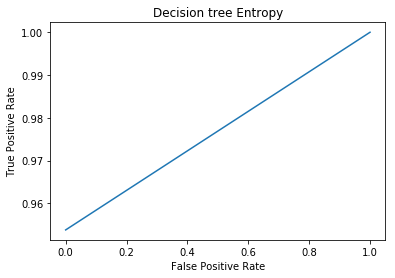

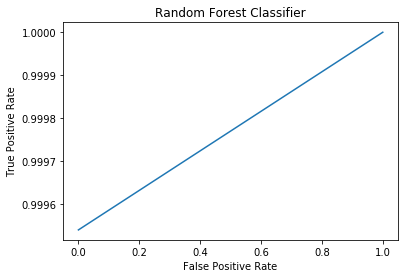

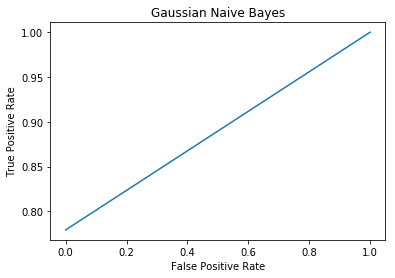

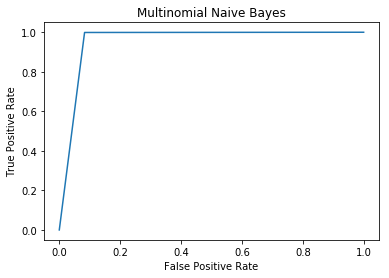

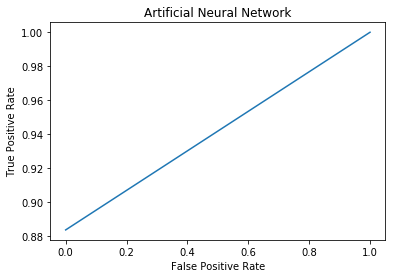

In [165]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

for index in range(len(Model_Names)):
    name = Model_Names.get(index)
    plt.title( name )
    plt.plot(False_positive_rate[index], True_positive_rate[index])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

In [147]:
True_positive_rate

[array([ 0.95376344,  1.        ]),
 array([ 0.95376344,  1.        ]),
 array([ 0.99964158,  1.        ]),
 array([ 0.77916027,  1.        ]),
 array([ 0.        ,  0.99882232,  1.        ]),
 array([ 0.99856631,  1.        ])]